<a href="https://colab.research.google.com/github/baraa-hakawati/Chicago-Crime-Analysis/blob/main/Chicago_Crime_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chicago Crime Analysis**

## Installations

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.5 MB/s eta 0:00:00


In [2]:
%pip install numpy==1.24.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.24.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
pymc 5.24.1 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires nu

In [1]:
%pip install --upgrade scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
cupy-cuda12x 13.3.0 requires numpy<2.3,>=1.22, but you have numpy 2.3.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.1 whi

In [1]:
%pip uninstall -y numpy pmdarima statsmodels
%pip install numpy==1.24.4 pmdarima statsmodels

Found existing installation: numpy 2.3.1
Uninstalling numpy-2.3.1:
  Successfully uninstalled numpy-2.3.1
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
Found existing installation: statsmodels 0.14.5
Uninstalling statsmodels-0.14.5:
  Successfully uninstalled statsmodels-0.14.5
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86

## **Part 1**

In [51]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays
import glob
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_percentage_error
from pmdarima import auto_arima
plt.rcParams['figure.figsize'] = (12, 4)
sns.set_context("talk", font_scale=0.9)
pd.set_option('display.max_columns', 50)
SEED = 321
np.random.seed(SEED)

In [25]:
# Reading the whole csv files
path = '/content/drive/MyDrive/AXSOSACADEMY/04-DataViz/Week15/Data/Data/*.csv'  # Reads all CSVs in the folder
all_files = glob.glob(path)
# Read and combine into one DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [26]:
# Viewing the data content
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 603.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
# Testing
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [29]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [30]:
# Adding new columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()

In [31]:
# Convert the date to datetime and set as index
df = df.set_index('date')

In [32]:
# Normalized missing values summary
missing_summary = df.isna().sum()
missing_percent = (missing_summary / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_percent.round(2)
}).sort_values(by='Missing %', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

                      Missing Count  Missing %
ward                         614846       7.97
latitude                      88685       1.15
longitude                     88685       1.15
location_description          10928       0.14
district                         47       0.00


In [33]:
# Drop rows missing lat/lon only if spatial analysis is needed
df = df.dropna(subset=['latitude', 'longitude'])
# Fill missing location descriptions with 'UNKNOWN'
df['location_description'] = df['location_description'].fillna('UNKNOWN')
# Fill missing districts using backward then forward fill (since only 47 missing)
df['district'] = df['district'].bfill()
df['district'] = df['district'].ffill()

In [34]:
# Daily counts
daily_crime = df.resample("D").size()

In [35]:
# Topic 1: Police Districts
district_crime = df[df['year'] == 2022].groupby('district').size().sort_values(ascending=False)
most_crime_district = district_crime.idxmax()
least_crime_district = district_crime.idxmin()
print(f"District with most crimes in 2022: {most_crime_district} ({district_crime.max()} crimes)")
print(f"District with least crimes in 2022: {least_crime_district} ({district_crime.min()} crimes)")

District with most crimes in 2022: 8.0 (14512 crimes)
District with least crimes in 2022: 31.0 (15 crimes)


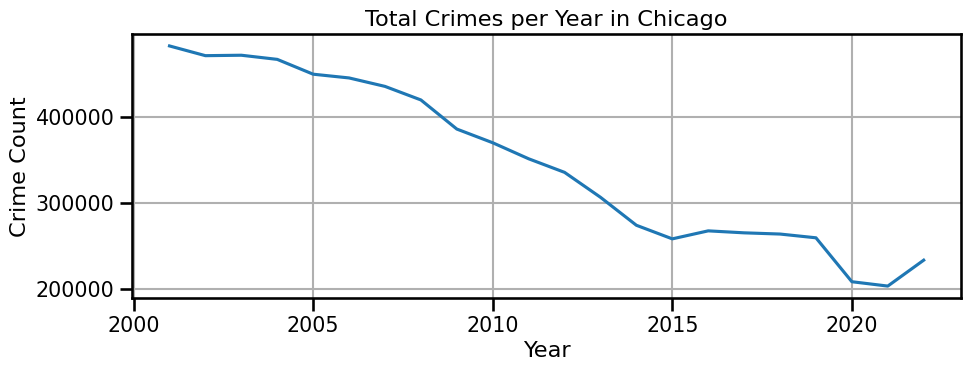

In [36]:
# Topic 2: Crimes Across Years
crime_by_year = df.groupby('year').size()
plt.figure(figsize=(10,4))
sns.lineplot(x=crime_by_year.index, y=crime_by_year.values)
plt.title("Total Crimes per Year in Chicago")
plt.xlabel("Year"); plt.ylabel("Crime Count")
plt.grid(); plt.tight_layout(); plt.show()

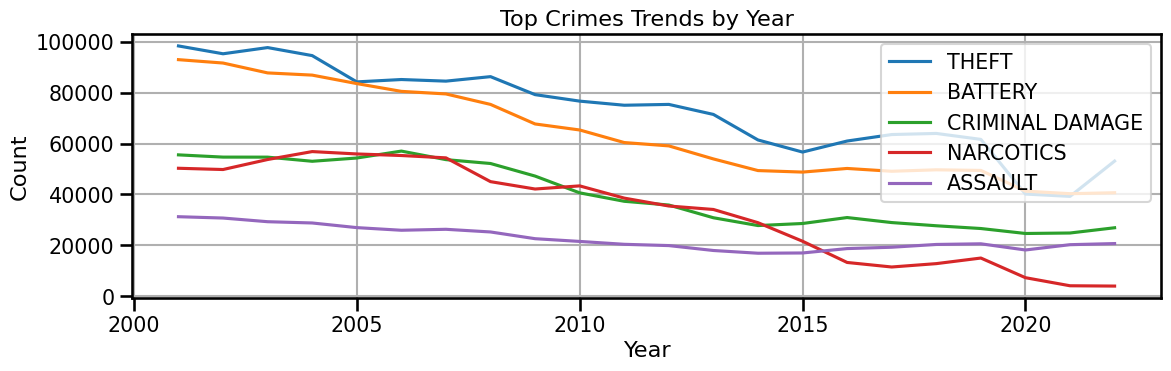

In [37]:
# Check individual crime trends
top_crimes = df['primary_type'].value_counts().head(5).index
for crime in top_crimes:
    sub = df[df['primary_type'] == crime].groupby('year').size()
    plt.plot(sub.index, sub.values, label=crime)
plt.legend(); plt.title("Top Crimes Trends by Year"); plt.xlabel("Year"); plt.ylabel("Count")
plt.grid(); plt.tight_layout(); plt.show()

In [38]:
# Topic 3: AM vs PM Rush Hour
am = df[(df['hour'] >= 7) & (df['hour'] < 10)]
pm = df[(df['hour'] >= 16) & (df['hour'] < 19)]
print(f"\nAM crimes: {len(am)}")
print(f"PM crimes: {len(pm)}")


AM crimes: 757433
PM crimes: 1196418


In [39]:
top_am = am['primary_type'].value_counts().head(5)
top_pm = pm['primary_type'].value_counts().head(5)
print("\nTop 5 AM Crimes:\n", top_am)
print("\nTop 5 PM Crimes:\n", top_pm)


Top 5 AM Crimes:
 primary_type
THEFT              181589
BATTERY            107747
CRIMINAL DAMAGE     80806
BURGLARY            73712
OTHER OFFENSE       61709
Name: count, dtype: int64

Top 5 PM Crimes:
 primary_type
THEFT              290853
BATTERY            212082
CRIMINAL DAMAGE    133427
NARCOTICS          101289
ASSAULT             89230
Name: count, dtype: int64


In [40]:
motor_am = am[am['primary_type'] == "MOTOR VEHICLE THEFT"].shape[0]
motor_pm = pm[pm['primary_type'] == "MOTOR VEHICLE THEFT"].shape[0]
print(f"\nMotor Vehicle Theft: AM = {motor_am}, PM = {motor_pm}")


Motor Vehicle Theft: AM = 41147, PM = 53213


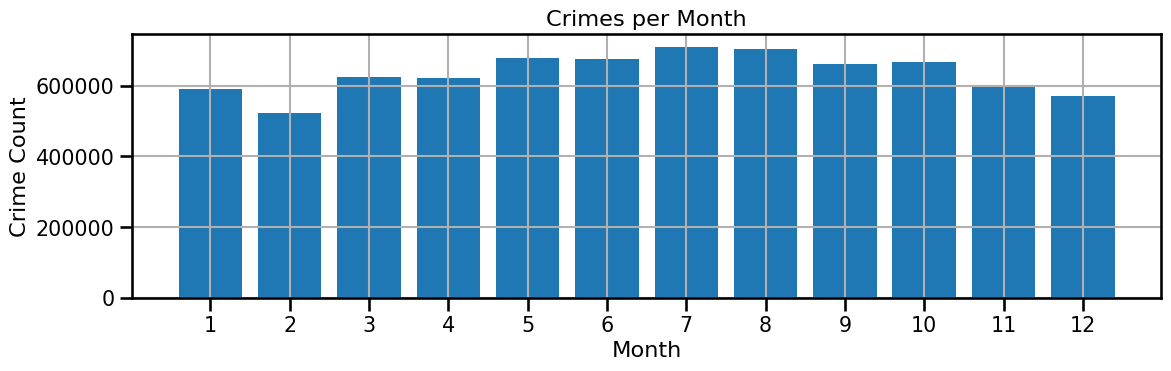

In [41]:
# Topic 4: Monthly Patterns
month_counts = df.groupby('month').size()
plt.bar(month_counts.index, month_counts.values)
plt.title("Crimes per Month"); plt.xlabel("Month"); plt.ylabel("Crime Count")
plt.xticks(range(1,13)); plt.grid(True); plt.tight_layout(); plt.show()

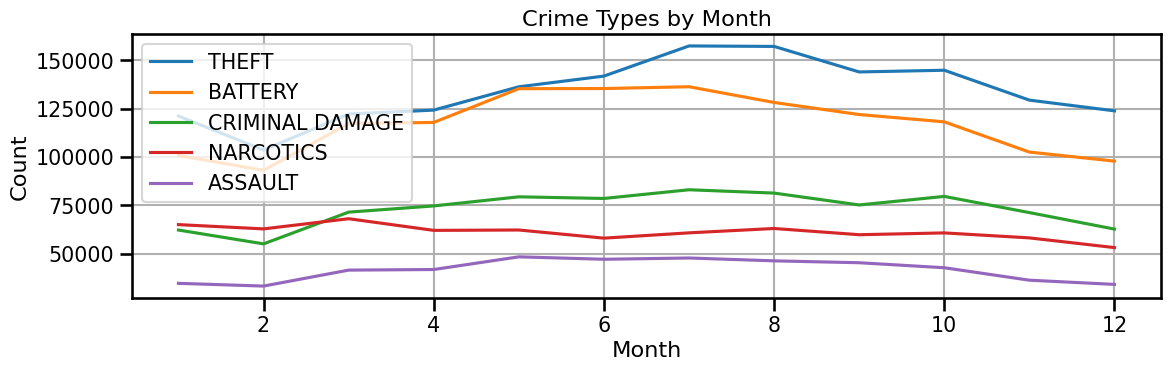

In [42]:
# Individual crime trends by month
for crime in top_crimes:
    month_trend = df[df['primary_type'] == crime].groupby('month').size()
    plt.plot(month_trend.index, month_trend.values, label=crime)
plt.legend(); plt.title("Crime Types by Month"); plt.xlabel("Month"); plt.ylabel("Count")
plt.grid(); plt.tight_layout(); plt.show()

In [43]:
# Topic 5: Crimes on Holidays
us_holidays = holidays.US(years=df['year'].unique())
df['is_holiday'] = [date in us_holidays for date in df.index.date]
holiday_crimes = df[df['is_holiday']]
holiday_names = pd.Series([us_holidays.get(date, "Unknown") for date in holiday_crimes.index.date])
top_holidays = holiday_names.value_counts().head(3)
print("\nTop 3 Holidays with most crimes:\n", top_holidays)


Top 3 Holidays with most crimes:
 New Year's Day      28356
Independence Day    22508
Labor Day           21850
Name: count, dtype: int64


In [44]:
# Top 5 crime types on each top holiday
for name in top_holidays.index:
    dates = [k for k, v in us_holidays.items() if v == name]
    # Convert the list of dates to a pandas DatetimeIndex for correct filtering
    holiday_dates = pd.DatetimeIndex(dates)
    crimes_on = df[df.index.isin(holiday_dates)]
    print(f"\n{name} - Top 5 crimes:\n", crimes_on['primary_type'].value_counts().head(5))


New Year's Day - Top 5 crimes:
 primary_type
THEFT                         703
OFFENSE INVOLVING CHILDREN    410
DECEPTIVE PRACTICE            274
OTHER OFFENSE                 251
CRIMINAL DAMAGE               157
Name: count, dtype: int64

Independence Day - Top 5 crimes:
 primary_type
CRIMINAL DAMAGE        115
THEFT                  112
DECEPTIVE PRACTICE      34
OTHER OFFENSE           34
MOTOR VEHICLE THEFT     33
Name: count, dtype: int64

Labor Day - Top 5 crimes:
 primary_type
THEFT                  161
CRIMINAL DAMAGE         88
OTHER OFFENSE           51
DECEPTIVE PRACTICE      44
MOTOR VEHICLE THEFT     38
Name: count, dtype: int64


/tmp/ipython-input-45-3854506624.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_series = df.resample("M").size()


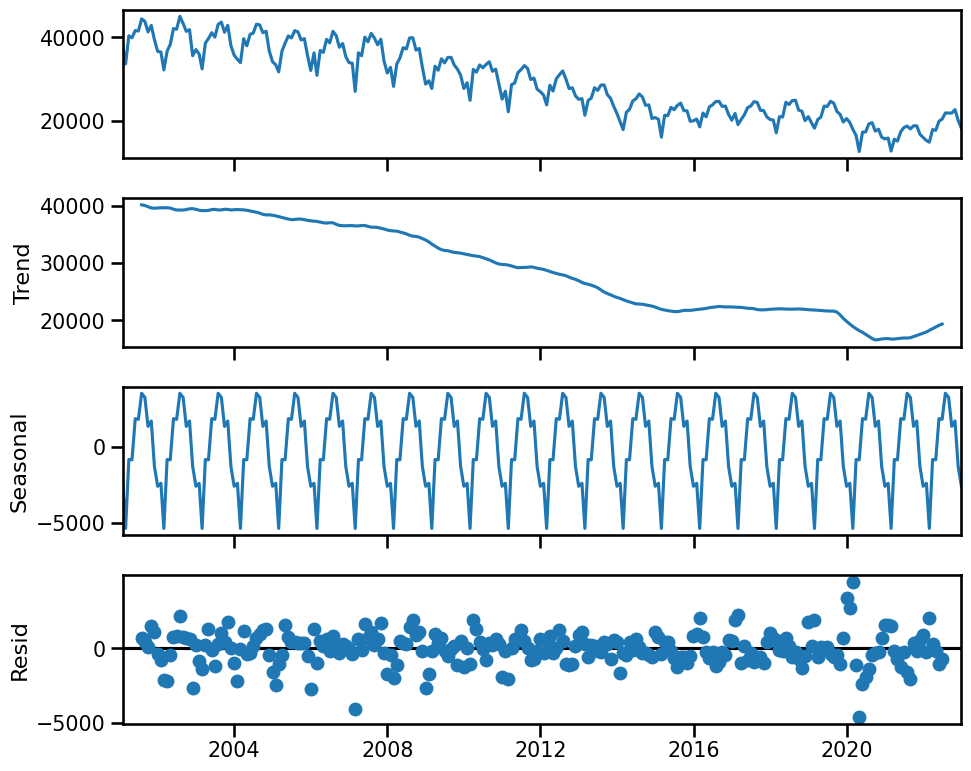

In [45]:
# Topic 6: Seasonality Detection
monthly_series = df.resample("M").size()
result = seasonal_decompose(monthly_series, model="additive")
fig = result.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [46]:
cycle_magnitude = monthly_series.max() - monthly_series.min()
print(f"\nApproximate cycle length: 12 months")
print(f"Cycle magnitude (Max - Min): {cycle_magnitude}")


Approximate cycle length: 12 months
Cycle magnitude (Max - Min): 32254


## Part2

In [47]:
# Forecast for Theft and Battery
selected_crimes = ['THEFT', 'BATTERY']

In [54]:
def prepare_monthly_series(crime_type):
    ts = df[df['primary_type'] == crime_type].resample("M").size()
    return ts

def decompose_and_plot(ts, crime_name):
    result = seasonal_decompose(ts, model='additive')
    result.plot()
    plt.suptitle(f'Seasonal Decomposition - {crime_name}')
    plt.tight_layout()
    plt.show()

def get_stationarity(ts):
    result = tsa.adfuller(ts)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    return result[1] < 0.05  # Stationary if p < 0.05

def plot_acf_pacf(ts, lags=24, title=""):
    fig, ax = plt.subplots(2,1,figsize=(10,6))
    tsa.graphics.plot_acf(ts, lags=lags, ax=ax[0])
    tsa.graphics.plot_pacf(ts, lags=lags, ax=ax[1])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def forecast_crime(ts, crime_name):
    # Split train/test
    train = ts[:-6]
    test = ts[-6:]

    # Manual SARIMA
    model = sm.tsa.SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
    results = model.fit()
    forecast = results.get_forecast(steps=6)
    pred_ci = forecast.conf_int()
    forecast_index = test.index

    forecast_df = pd.DataFrame({
        "mean": forecast.predicted_mean,
        "mean_ci_lower": pred_ci.iloc[:, 0],
        "mean_ci_upper": pred_ci.iloc[:, 1]
    }, index=forecast_index)

    # Plot
    plt.figure(figsize=(10,4))
    plt.plot(train[-12:], label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast_df['mean'], label='Forecast', color='green')
    plt.fill_between(forecast_index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='green', alpha=0.2)
    plt.title(f"{crime_name} Forecast - Manual SARIMA")
    plt.legend(); plt.grid(); plt.tight_layout()
    plt.show()

    # Metrics
    mae = mean_absolute_error(test, forecast_df['mean'])
    rmse = root_mean_squared_error(test, forecast_df['mean'])
    mape = mean_absolute_percentage_error(test, forecast_df['mean']) * 100
    print(f"{crime_name} - Manual SARIMA Metrics\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

    # Auto-ARIMA
    auto_model = auto_arima(train, seasonal=True, m=12, trace=True, suppress_warnings=True)
    auto_forecast = auto_model.predict(n_periods=6)

    # Plot Auto-ARIMA forecast
    plt.figure(figsize=(10,4))
    plt.plot(train[-12:], label='Train')
    plt.plot(test, label='Test')
    plt.plot(test.index, auto_forecast, label='Auto ARIMA Forecast', color='red')
    plt.title(f"{crime_name} Forecast - Auto ARIMA")
    plt.legend(); plt.grid(); plt.tight_layout()
    plt.show()

    # Metrics
    mae = mean_absolute_error(test, auto_forecast)
    rmse = root_mean_squared_error(test, auto_forecast)
    mape = mean_absolute_percentage_error(test, auto_forecast) * 100
    print(f"{crime_name} - Auto ARIMA Metrics\nMAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

    # Future Forecast (Next 6 months)
    final_model = auto_arima(ts, seasonal=True, m=12)
    future_forecast = final_model.predict(n_periods=6)

    forecast_dates = pd.date_range(ts.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
    plt.figure(figsize=(10,4))
    plt.plot(ts, label='Historical')
    plt.plot(forecast_dates, future_forecast, label='Future Forecast', color='purple')
    plt.title(f"{crime_name} - 6 Month Forecast")
    plt.legend(); plt.grid(); plt.tight_layout()
    plt.show()

    delta = future_forecast[-1] - future_forecast[0]
    percent_change = (delta / future_forecast[0]) * 100
    print(f"{crime_name} Forecast Delta: {delta:.0f} crimes, {percent_change:.2f}% change")





====== THEFT FORECASTING ======


/tmp/ipython-input-54-2037234845.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df[df['primary_type'] == crime_type].resample("M").size()
/tmp/ipython-input-56-3561291559.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = ts.asfreq('M')



Decomposition:


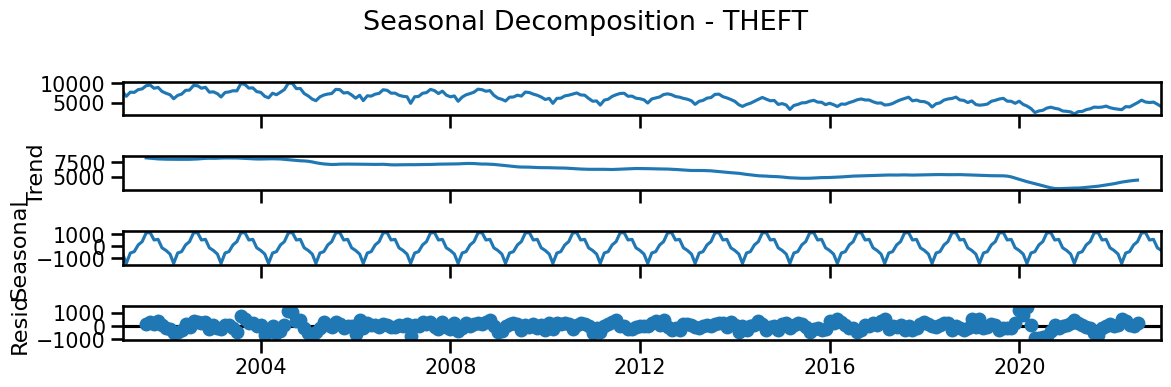


Stationarity Check:
ADF Statistic: -1.260
p-value: 0.647
Differenced data used.


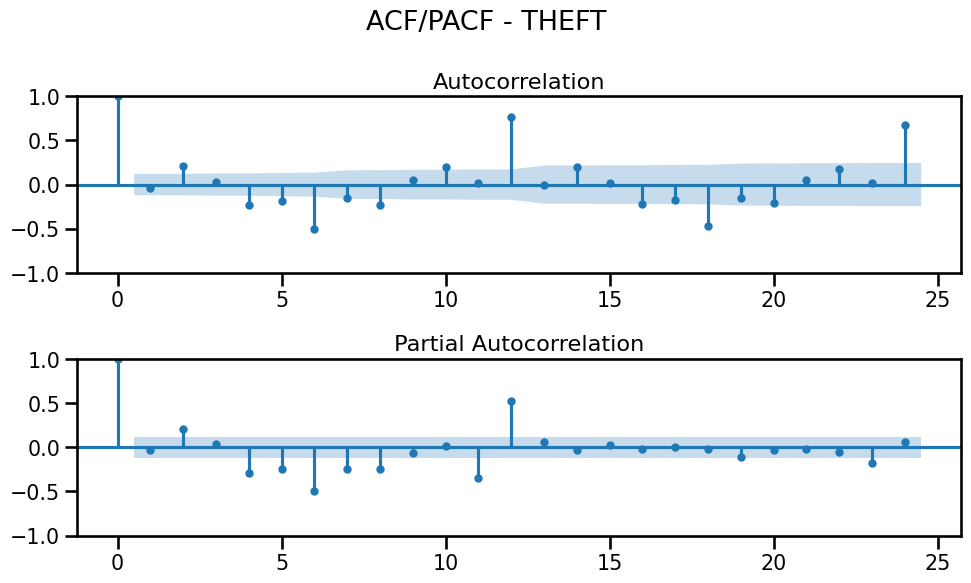

/tmp/ipython-input-54-2037234845.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df[df['primary_type'] == crime_type].resample("M").size()


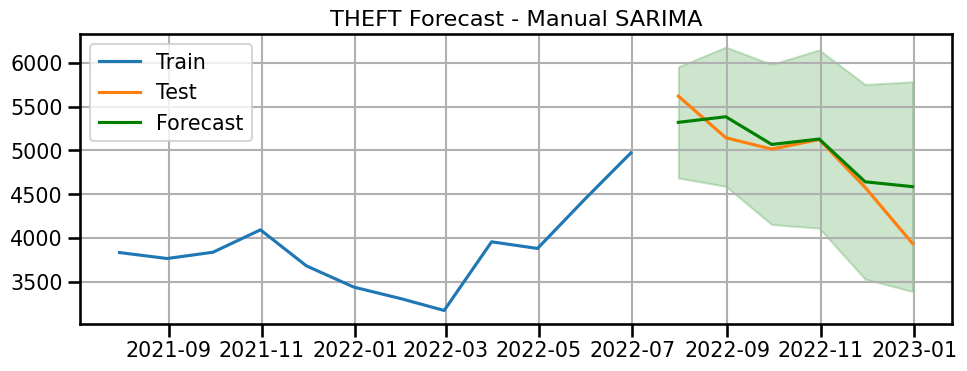

THEFT - Manual SARIMA Metrics
MAE: 218.97, RMSE: 310.40, MAPE: 4.85%
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4044.142, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3797.697, Time=0.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3913.429, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4042.223, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4045.100, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3780.589, Time=1.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=5.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3748.914, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3912.669, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3747.571, Time=2.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3872.032, Time=1.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3759.006, Time=4.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=3762.110, Time=3.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=3748.045, Time=6.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12]             : AIC=inf, Time=1.91 sec

Best model:  ARIMA(1,1,0)(1,0,2)[12] intercept
Total fit time: 43.421 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


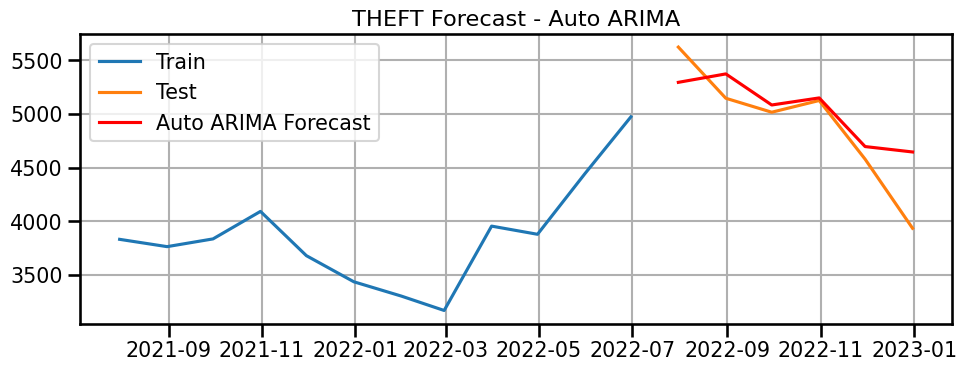

THEFT - Auto ARIMA Metrics
MAE: 245.53, RMSE: 337.11, MAPE: 5.44%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

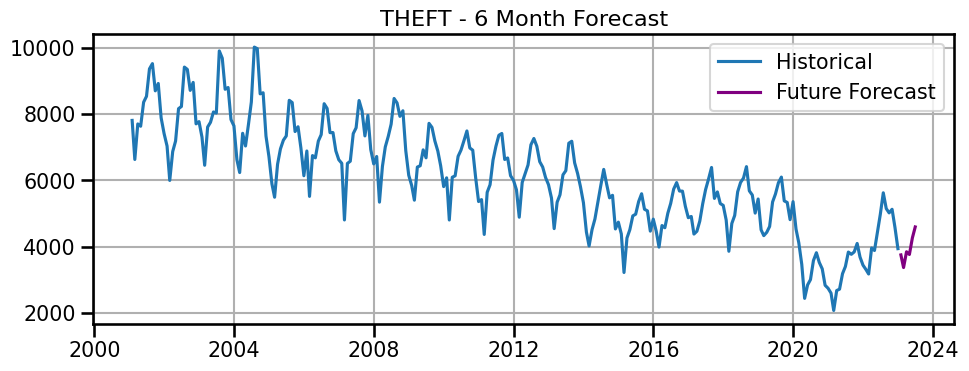

/tmp/ipython-input-54-2037234845.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta = future_forecast[-1] - future_forecast[0]
/tmp/ipython-input-54-2037234845.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent_change = (delta / future_forecast[0]) * 100


THEFT Forecast Delta: 844 crimes, 22.53% change


====== BATTERY FORECASTING ======


/tmp/ipython-input-54-2037234845.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df[df['primary_type'] == crime_type].resample("M").size()
/tmp/ipython-input-56-3561291559.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = ts.asfreq('M')



Decomposition:


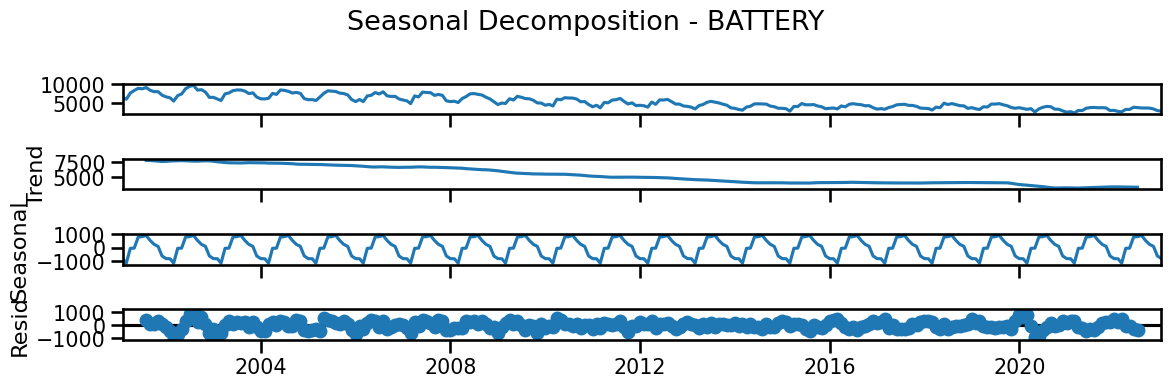


Stationarity Check:
ADF Statistic: -0.794
p-value: 0.821
Differenced data used.


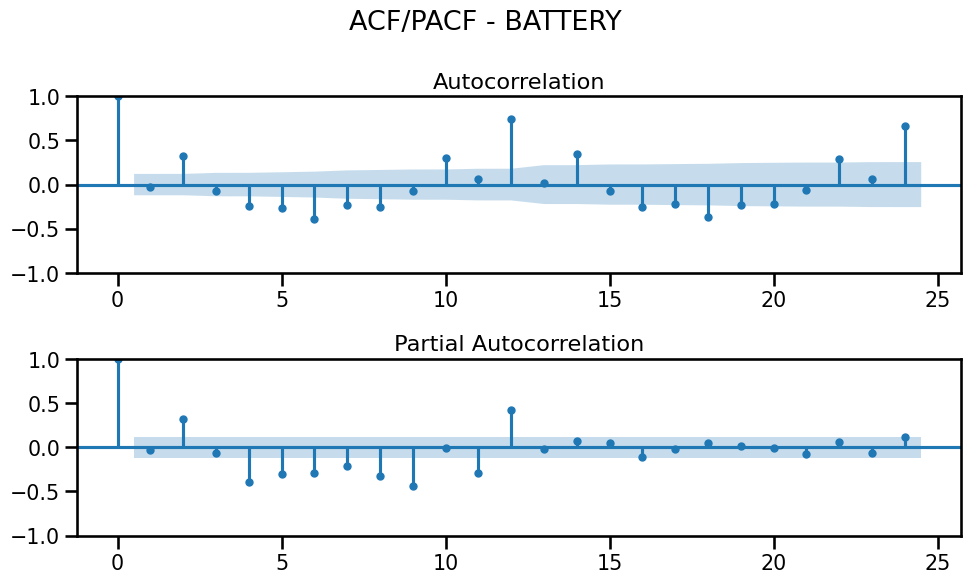

/tmp/ipython-input-54-2037234845.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df[df['primary_type'] == crime_type].resample("M").size()


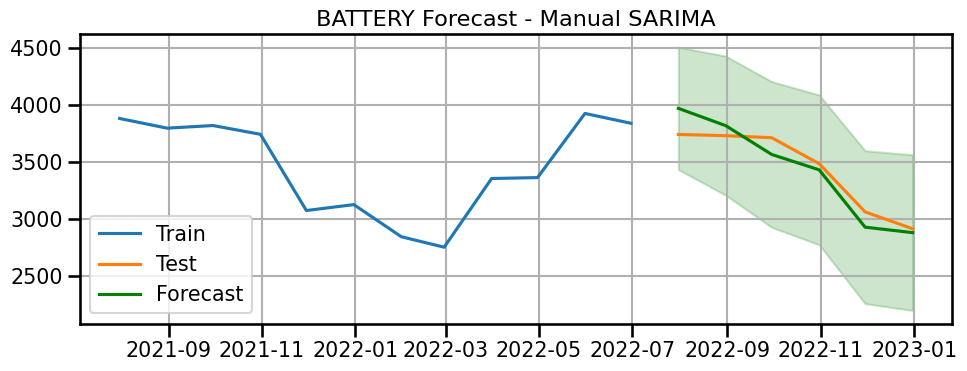

BATTERY - Manual SARIMA Metrics
MAE: 114.22, RMSE: 131.46, MAPE: 3.25%
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3999.364, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3763.870, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3875.755, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3997.450, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4000.963, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.66 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3688.381, Time=1.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3874.301, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3690.254, Time=4.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3690.196, Time=3.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3842.386, Time=1.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=3.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3708.484, Time=0.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=3686.577, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=3868.988, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=3762.042, Time=1.90 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=3699.579, Time=5.85 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=3711.118, Time=2.68 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=3970.246, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=3839.937, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=7.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=3689.191, Time=1.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.96 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12]             : AIC=3684.850, Time=0.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12]             : AIC=3867.066, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12]             : AIC=3760.133, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,1)[12]             : AIC=inf, Time=6.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,2)[12]             : AIC=3686.646, Time=1.78 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=3968.287, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,2)[12]             : AIC=3838.010, Time=1.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,0)[12]             : AIC=inf, Time=0.91 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,0,2)[12]             : AIC=inf, Time=4.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12]             : AIC=3686.715, Time=0.97 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,0,1)[12]             : AIC=3685.244, Time=4.75 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12]             : AIC=3662.633, Time=1.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12]             : AIC=3869.001, Time=0.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=3733.069, Time=1.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,1,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.11/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pmdarima/arima/arima.py", line 510, in _fit

 ARIMA(2,1,1)(2,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(2,1,1)(1,0,2)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(2,1,1)(0,0,0)[12]             : AIC=3970.180, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[12]             : AIC=3840.010, Time=1.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,0)[12]             : AIC=inf, Time=4.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,0,2)[12]             : AIC=inf, Time=4.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=inf, Time=1.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,0,1)[12]             : AIC=inf, Time=1.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[12]             : AIC=inf, Time=2.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12]             : AIC=inf, Time=6.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(3,1,2)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.11/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pmdarima/arima/arima.py", line 510, in _fit

 ARIMA(3,1,2)(1,0,1)[12]             : AIC=inf, Time=nan sec

Best model:  ARIMA(2,1,1)(1,0,1)[12]          
Total fit time: 103.677 seconds


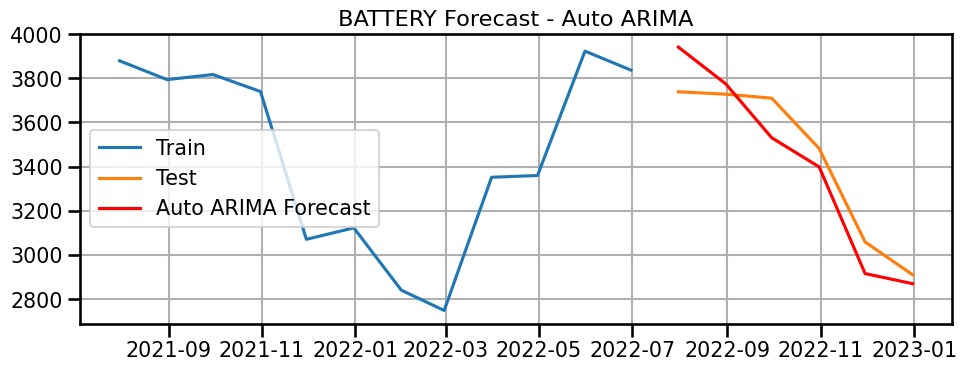

BATTERY - Auto ARIMA Metrics
MAE: 115.80, RMSE: 131.78, MAPE: 3.32%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

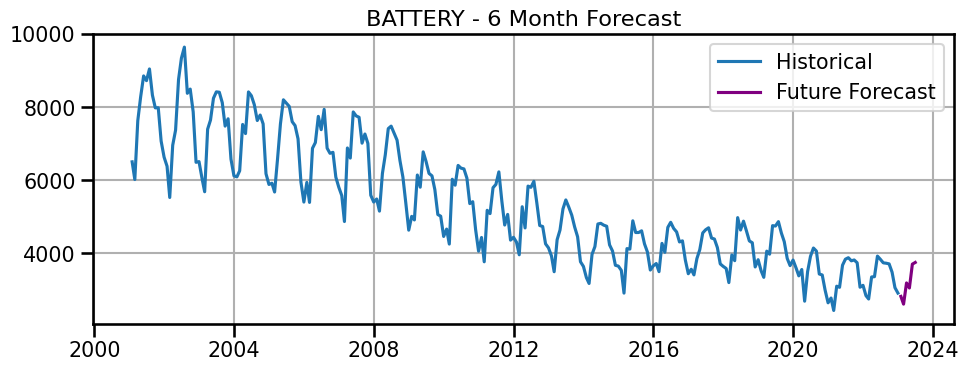

BATTERY Forecast Delta: 929 crimes, 32.93% change


/tmp/ipython-input-54-2037234845.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta = future_forecast[-1] - future_forecast[0]
/tmp/ipython-input-54-2037234845.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent_change = (delta / future_forecast[0]) * 100


In [56]:
# Run full pipeline for both crimes
for crime in selected_crimes:
    print(f"\n\n====== {crime.upper()} FORECASTING ======")
    ts = prepare_monthly_series(crime)
    ts = ts.asfreq('M')
    ts = ts.fillna(0)
    print("\nDecomposition:")
    decompose_and_plot(ts, crime)
    print("\nStationarity Check:")
    if not get_stationarity(ts):
        ts = ts.diff().dropna()
        print("Differenced data used.")
    plot_acf_pacf(ts, title=f"ACF/PACF - {crime}")
    forecast_crime(prepare_monthly_series(crime), crime)

## Forecast Analysis Summary

### Forecast Results for Selected Crimes

#### 1. Theft
- **Manual SARIMA Metrics**  
  - MAE: **218.97**  
  - RMSE: **310.40**  
  - MAPE: **4.85%**
- **Auto ARIMA Metrics**  
  - MAE: **245.53**  
  - RMSE: **337.11**  
  - MAPE: **5.44%**
- **Forecast Delta (last - first month):** **+844 crimes**
- **Percent Change:** **+22.53%**

---

#### 2. Battery
- **Manual SARIMA Metrics**  
  - MAE: **114.22**  
  - RMSE: **131.46**  
  - MAPE: **3.25%**
- **Auto ARIMA Metrics**  
  - MAE: **115.80**  
  - RMSE: **131.78**  
  - MAPE: **3.32%**
- **Forecast Delta (last - first month):** **+929 crimes**
- **Percent Change:** **+32.93%**

---

## Final Evaluation

### Which crime is forecasted to have the **highest monthly count** by the end of the forecast?
**Battery** is forecasted to have the highest monthly count at the end of the 6-month period.

### Which crime is forecasted to have the **highest net change** by the end of the forecast?
**Battery** with a net increase of **+929 crimes**, compared to **+844 crimes** for Theft.

### Which crime has the **highest percent change**?
**Battery**, with a **32.93%** increase, compared to **22.53%** for Theft.

---

## Final Recommendations to Stakeholders

Based on both the manual and auto ARIMA model forecasts:

- **Battery** is expected to rise significantly — both in raw crime volume and percentage growth.
- **Theft** is also forecasted to increase, but at a lower rate and slightly lower accuracy.
- **Auto-ARIMA** slightly underperformed compared to **manual SARIMA**, especially for Theft.

### Strategic Actions

1. **Prioritize increased policing and outreach in areas with high Battery incidents** (especially those already flagged in district analysis).
2. **Boost patrols during high-risk time blocks**, particularly **PM rush hour** (4–7 PM), where Battery and Theft both spike.
3. **Implement crime prevention programs** before and during national holidays like **New Year’s Day** and **Independence Day**, where historical spikes occur.
4. **Focus on early intervention and conflict de-escalation training**, as Battery crimes are often personal or domestic in nature.

---
